<a href="https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/thermodynamics/ThermodynamicsOfHydrogen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#@title Thermodynamics and physical properties of hydrogen
#@markdown This page will give an introduction to how to calculate thermodynamic and physical properties of hydrogen.
#@markdown <br><br>This document is part of the module ["Introduction to Gas Processing using NeqSim in Colab"](https://colab.research.google.com/github/EvenSol/NeqSim-Colab/blob/master/notebooks/examples_of_NeqSim_in_Colab.ipynb#scrollTo=_eRtkQnHpL70).
%%capture
!pip install neqsim
import neqsim
from neqsim.thermo.thermoTools import *
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('classic')
%matplotlib inline

#Litterature
https://www.engineeringtoolbox.com/hydrogen-d_1419.html

Thermodynamic and transport properties of hydrogen containing streams:
https://www.nature.com/articles/s41597-020-0568-6

#Hydrogen properties
* Hydrogen is the lightest element and will explode at concentrations ranging from 4-75 percent by volume in the presence of sunlight, a flame, or a spark.
* Despite its stability, hydrogen forms many bonds and is present in many different compounds.
* Three naturally occurring isotopes of hydrogen exist: protium, deuterium, and tritium, each with different properties due to the difference in the number of neutrons in the nucleus.

Hydrogen is the smallest chemical element because it consists of only one proton in its nucleus. Its symbol is H, and its atomic number is 1. It has an average atomic weight of 1.0079 amu, making it the lightest element. Hydrogen is the most abundant chemical substance in the universe, especially in stars and gas giant planets. However, monoatomic hydrogen is rare on Earth is rare due to its propensity to form covalent bonds with most elements. At standard temperature and pressure, hydrogen is a nontoxic, nonmetallic, odorless, tasteless, colorless, and highly combustible diatomic gas with the molecular formula H2. Hydrogen is also prevalent on Earth in the form of chemical compounds such as hydrocarbons and water.

Hydrogen has one one proton and one electron; the most common isotope, protium (1H), has no neutrons. Hydrogen has a melting point of -259.14 °C and a boiling point of -252.87 °C. Hydrogen has a density of 0.08988 g/L, making it less dense than air. It has two distinct oxidation states, (+1, -1), which make it able to act as both an oxidizing and a reducing agent. Its covalent radius is 31.5 pm.

Hydrogen exists in two different spin isomers of hydrogen diatomic molecules that differ by the relative spin of their nuclei. The orthohydrogen form has parallel spins; the parahydrogen form has antiparallel spins. At standard temperature and pressure, hydrogen gas consists of 75 percent orthohydrogen and 25 percent parahydrogen. Hydrogen is available in different forms, such as compressed gaseous hydrogen, liquid hydrogen, and slush hydrogen (composed of liquid and solid), as well as solid and metallic forms.

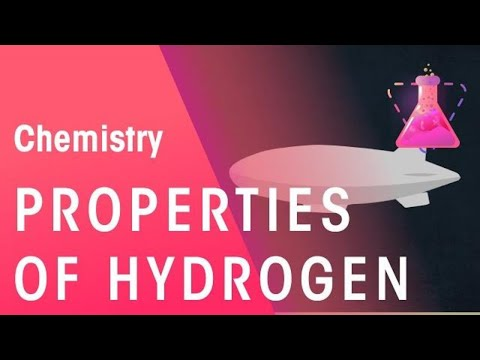

In [2]:
#@title Introduction to properties of hydrogen
#@markdown This video gives an intriduction to properties of hydrogen
from IPython.display import YouTubeVideo
YouTubeVideo('U-MNKK20Z_g', width=600, height=400)

# NeqSim and hydrogen

One of the key features of NeqSim is its ability to model hydrogen at high pressures and temperatures, which is particularly important for applications such as fuel cells and hydrogen production. The software uses a variety of thermodynamic models to accurately describe the behavior of hydrogen under these conditions, including the Peng-Robinson equation of state and the GERG-2008 equation of state.

In addition to its equation of state models, NeqSim also includes a wide range of physical property models for hydrogen, including models for viscosity, thermal conductivity, and surface tension. These models allow for accurate prediction of the physical behavior of hydrogen in a variety of applications, such as gas pipelines and cryogenic systems.

NeqSim is also capable of performing process simulations, allowing for the modeling of complex systems involving hydrogen, such as fuel cell systems and hydrogen production plants. The software can be used to optimize these systems, by predicting the behavior of hydrogen and other components under different operating conditions.

In [3]:
#@title  Calculation of vapour pressure and density of hydrogen
#@markdown Hydrogen vapour pressure and phase densities can be calculated using a classic EoS such as the Peng Robinson.
#@markdown

from neqsim.thermo import fluid, TPflash

fluid1 = fluid('pr')
fluid1.addComponent('hydrogen', 1.0)
fluid1.setPressure(1.01325, 'bara')
fluid1.setTemperature(-250.0, 'C')
dewt(fluid1);
fluid1.initProperties()
print('buble point temperature', fluid1.getTemperature('C'), " at ", fluid1.getPressure(), " bara")
print('gas density ', fluid1.getPhase('gas').getDensity())
print('liquid density ', fluid1.getPhase('oil').getDensity())

ERROR:neqsim.thermo.thermoTools:error could not calculate


buble point temperature -252.80235819230342  at  1.01325  bara
gas density  1.3305043138535513
liquid density  88.59095725029313


#Accuracy of property calculations for hydrogen
In the following section we will evaluate models for calculation of preoprties of hydrogen dominated systems.

In the following example we compare density calculations using SRK/PR EoS to the GERG-2008 EoS.

##Calculation of density of hydrogen
In the following example we evaluate the accuracy density calculation of two common EoS (SRK/PR) by comparing the the GERG-2008 EoS reference EoS.

Pure component hydrogen parameters for SRK/PR EoS 
Critical temperature  33.19999999999999  [K]
Critical pressure  12.97  [bara]
Accentric factor  -0.22  [-]


Text(0, 0.5, 'Deviation [%]')

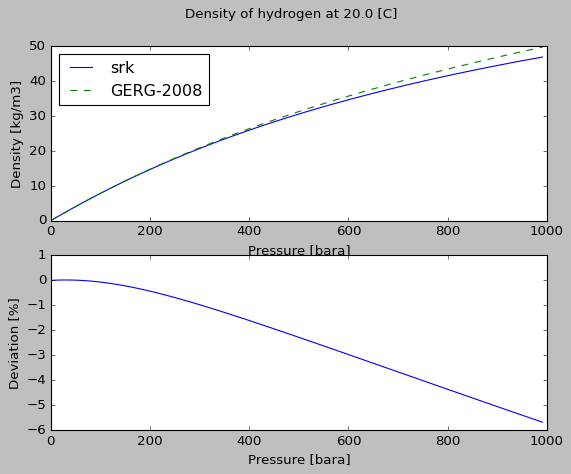

In [4]:
#@title Select component and equation of state. Set temperature [C] and pressure range [bara]. { run: "auto" }
temperature = 20.0   #@param {type:"number"}
minPressure = 1.0  #@param {type:"number"}
maxPressure = 1000.0  #@param {type:"number"}
eosname = "srk" #@param ["srk", "pr"]
R = 8.314 # J/mol/K

# Creating a fluid in neqsim
fluid1 = fluid(eosname) #create a fluid using the SRK-EoS
fluid1.addComponent('hydrogen', 1.0) #adding 1 mole to the fluid
fluid1.init(0);


def realgasdensity(pressure, temperature):
    fluid1.setPressure(pressure, 'bara')
    fluid1.setTemperature(temperature, "C")
    TPflash(fluid1)
    fluid1.initPhysicalProperties();
    return fluid1.getDensity('kg/m3')

def GERGgasdensity(pressure, temperature):
    fluid1.setPressure(pressure, 'bara')
    fluid1.setTemperature(temperature, 'C')
    TPflash(fluid1)
    return fluid1.getPhase('gas').getDensity_GERG2008()

pressure = np.arange(minPressure, maxPressure, int((maxPressure-minPressure)/100)+1)
realdensity = [realgasdensity(P,temperature) for P in pressure]
GERG2008density = [GERGgasdensity(P,temperature) for P in pressure]
deviation = [((realgasdensity(P,temperature)-GERGgasdensity(P,temperature))/GERGgasdensity(P,temperature)*100.0) for P in pressure]

print('Pure component hydrogen parameters for SRK/PR EoS ')
print('Critical temperature ', fluid1.getComponent('hydrogen').getTC(), ' [K]')
print('Critical pressure ', fluid1.getComponent('hydrogen').getPC(), ' [bara]')
print('Accentric factor ', fluid1.getComponent('hydrogen').getAcentricFactor(), ' [-]')
fig = plt.figure()
plt.subplot(2, 1, 1)
plt.plot(pressure, realdensity, '-')
plt.plot(pressure, GERG2008density, '--')
plt.xlabel('Pressure [bara]')
plt.ylabel('Density [kg/m3]')
plt.legend([eosname, 'GERG-2008'],loc='best')
plt.subplot(2, 1, 2)
title = 'Density of hydrogen at '+ str(temperature)+ ' [C]'
fig.suptitle(title)
plt.plot(pressure, deviation)
plt.xlabel('Pressure [bara]')
plt.ylabel('Deviation [%]')

#Phase envelope of hydrogen dominated gas mixtures
In the follwing section we will evaluate the phase behaviour of gas mixtures dominated by hydrogen.

Natural Gas Fluid:

  ComponentName  MolarComposition[-]
0      hydrogen                 90.0
1           CO2                  0.0
2       methane                 10.0
3        ethane                  0.0
4       propane                  0.0
5      i-butane                  0.0
6      n-butane                  0.0
7     i-pentane                  0.0
8     n-pentane                  0.0


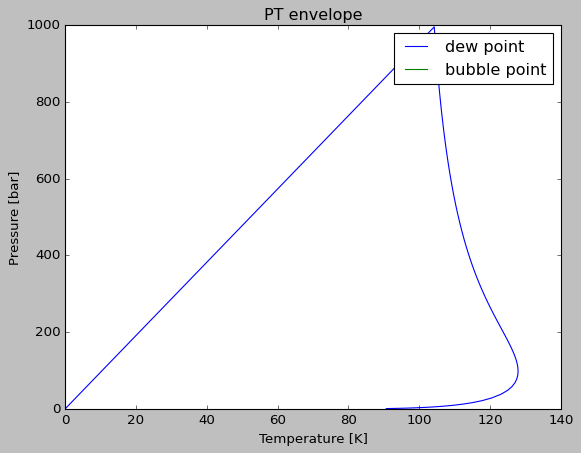

cricobarP  1005.1706387836066   [bara]   cricobarT  104.15321202245252  °K
cricothermP  98.5400144930751   [bara]   cricothermT  127.89036440825643  °K


In [5]:
import pandas as pd

naturalgas = {'ComponentName':  ["hydrogen", "CO2", "methane", "ethane", "propane", "i-butane", "n-butane","i-pentane", "n-pentane"],
       'MolarComposition[-]':  [90.0, 0.0, 10.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
}


naturalgasdf = pd.DataFrame(naturalgas)
print("Natural Gas Fluid:\n")
print(naturalgasdf.head(30).to_string())

naturalgasFluid = fluid_df(naturalgasdf)

gasPhaseEnvelope = phaseenvelope(naturalgasFluid,True)
cricobar = gasPhaseEnvelope.get("cricondenbar")
cricotherm = gasPhaseEnvelope.get("cricondentherm")
print("cricobarP ",  cricobar[1], "  [bara] ", " cricobarT ", cricobar[0], " °K")
print("cricothermP ",  cricotherm[1], "  [bara] ", " cricothermT ", cricotherm[0], " °K")

# Calculation of hydrogen properties using the GERG-2008 EoS
In the following example we will use the GERG-EoS to calculate properties of hydrogen.

In [6]:
gasFluid = fluid('pr') #Create a fluid uning the Peng Robinson EoS
gasFluid.addComponent('hydrogen', 0.9, 'mole/sec')
gasFluid.setMixingRule('classic')

#Set pressure and temperature and calculate properties
gasFluid.setTemperature(20.0, 'C')
gasFluid.setPressure(20.0, 'bara')
TPflash(gasFluid)
gasFluid.initProperties()

properties = gasFluid.getPhase('gas').getProperties_GERG2008()

print("Compressibility factor: ", properties[1])
print("d(P)/d(rho) [kPa/(mol/l)] ", properties[2])
print("d^2(P)/d(rho)^2 [kPa/(mol/l)^2]: ",properties[3])
print("d2(P)/d2(T) [kPa/K]:", properties[4])
print("d(P)/d(T) [kPa/K]: ", properties[5])
print("Enthalpy [J/mol]:  ", properties[7])
print("Entropy [J/mol-K]: ",properties[8])
print("Isochoric heat capacity [J/mol-K]:",properties[9])
print("Isobaric heat capacity [J/mol-K]: ",properties[10])
print("Speed of sound [m/s]:  ",properties[11])
print("Gibbs energy [J/mol]: ",properties[12])
print("Joule-Thomson coefficient [K/kPa]: " ,properties[13])
print("Isentropic exponent: ",properties[14])

gergDensity = gasFluid.getPhase('gas').getDensity_GERG2008()
print("Density [kg/m3]: ", gergDensity)

Compressibility factor:  1.0117723188083418
d(P)/d(rho) [kPa/(mol/l)]  2495.3967367985256
d^2(P)/d(rho)^2 [kPa/(mol/l)^2]:  73.82867814668732
d2(P)/d2(T) [kPa/K]: 8.595191627130891
d(P)/d(T) [kPa/K]:  6.856289122996033
Enthalpy [J/mol]:   -127.68600489632873
Entropy [J/mol-K]:  -25.327301385413335
Isochoric heat capacity [J/mol-K]: 20.514329596446462
Isobaric heat capacity [J/mol-K]:  28.91053944402919
Speed of sound [m/s]:   1320.7995020938679
Gibbs energy [J/mol]:  7297.012396237591
Joule-Thomson coefficient [K/kPa]:  -0.00029196442088090464
Isentropic exponent:  1.4260380125916234
Density [kg/m3]:  1.6349826804123533


# GERG-2008 for hydrogen and natural gas
In the following exmaple we use the GERG-2008 EoS to calculate the properties of a mixture of hydrogen and methane/ethane

In [7]:
gasFluid = fluid('pr') #Create a fluid uning the Peng Robinson EoS
gasFluid.addComponent('methane', 0.05, 'mole/sec')
gasFluid.addComponent('ethane', 0.05, 'mole/sec')
gasFluid.addComponent('hydrogen', 0.9, 'mole/sec')
gasFluid.setMixingRule('classic')

#Set pressure and temperature and calculate properties
gasFluid.setTemperature(20.0, 'C')
gasFluid.setPressure(20.0, 'bara')
TPflash(gasFluid)
gasFluid.initProperties()

properties = gasFluid.getPhase('gas').getProperties_GERG2008()

print("Compressibility factor: ", properties[1])
print("d(P)/d(rho) [kPa/(mol/l)] ", properties[2])
print("d^2(P)/d(rho)^2 [kPa/(mol/l)^2]: ",properties[3])
print("d2(P)/d2(T) [kPa/K]:", properties[4])
print("d(P)/d(T) [kPa/K]: ", properties[5])
print("Enthalpy [J/mol]:  ", properties[7])
print("Entropy [J/mol-K]: ",properties[8])
print("Isochoric heat capacity [J/mol-K]:",properties[9])
print("Isobaric heat capacity [J/mol-K]: ",properties[10])
print("Speed of sound [m/s]:  ",properties[11])
print("Gibbs energy [J/mol]: ",properties[12])
print("Joule-Thomson coefficient [K/kPa]: " ,properties[13])
print("Isentropic exponent: ",properties[14])

gergDensity = gasFluid.getPhase('gas').getDensity_GERG2008()
print("Density [kg/m3]: ", gergDensity)

Compressibility factor:  1.0091813511710588
d(P)/d(rho) [kPa/(mol/l)]  2483.0351793710392
d^2(P)/d(rho)^2 [kPa/(mol/l)^2]:  59.43276455297705
d2(P)/d2(T) [kPa/K]: 8.673088387524809
d(P)/d(T) [kPa/K]:  6.905298834022544
Enthalpy [J/mol]:   -159.22298173255533
Entropy [J/mol-K]:  -22.133232643008775
Isochoric heat capacity [J/mol-K]: 22.009238863722906
Isobaric heat capacity [J/mol-K]:  30.524531364591894
Speed of sound [m/s]:   914.2644411258295
Gibbs energy [J/mol]:  6329.134167565467
Joule-Thomson coefficient [K/kPa]:  0.00010713931987949455
Isentropic exponent:  1.400016208677884
Density [kg/m3]:  3.3499528316130935


# Pure hydrogen properties

In [11]:
gasFluid = fluid('pr') #Create a fluid uning the Peng Robinson EoS
gasFluid.addComponent('hydrogen', 0.9, 'mole/sec')
gasFluid.setMixingRule('classic')

#Set pressure and temperature and calculate properties
gasFluid.setTemperature(20.0, 'C')
gasFluid.setPressure(20.0, 'bara')
TPflash(gasFluid)
gasFluid.initProperties()

properties = gasFluid.getPhase('gas').getProperties_Leachman()

print("Compressibility factor: ", properties[1])
print("d(P)/d(rho) [kPa/(mol/l)] ", properties[2])
print("d^2(P)/d(rho)^2 [kPa/(mol/l)^2]: ",properties[3])
print("d2(P)/d2(T) [kPa/K]:", properties[4])
print("d(P)/d(T) [kPa/K]: ", properties[5])
print("Enthalpy [J/mol]:  ", properties[7])
print("Entropy [J/mol-K]: ",properties[8])
print("Isochoric heat capacity [J/mol-K]:",properties[9])
print("Isobaric heat capacity [J/mol-K]: ",properties[10])
print("Speed of sound [m/s]:  ",properties[11])
print("Gibbs energy [J/mol]: ",properties[12])
print("Joule-Thomson coefficient [K/kPa]: " ,properties[13])
print("Isentropic exponent: ",properties[14])

gergDensity = gasFluid.getPhase('gas').getDensity_Leachman()
print("Density [kg/m3]: ", gergDensity)

Compressibility factor:  1.011901250033632
d(P)/d(rho) [kPa/(mol/l)]  2495.903378196178
d^2(P)/d(rho)^2 [kPa/(mol/l)^2]:  74.00283781280405
d2(P)/d2(T) [kPa/K]: 8.595790543323213
d(P)/d(T) [kPa/K]:  6.855574091700008
Enthalpy [J/mol]:   7798.117570420374
Entropy [J/mol-K]:  82.27538881815653
Isochoric heat capacity [J/mol-K]: 20.516040015224576
Isobaric heat capacity [J/mol-K]:  28.911010582441243
Speed of sound [m/s]:   1320.8892751170395
Gibbs energy [J/mol]:  -16320.91266162221
Joule-Thomson coefficient [K/kPa]:  -0.0002994242485626575
Isentropic exponent:  1.426043630473911
Density [kg/m3]:  1.6346695803723796


In [13]:
from neqsim import jneqsim

gasFluid = jneqsim.thermo.system.SystemLeachmanEos()
gasFluid.addComponent('hydrogen', 0.9, 'mole/sec')

gasFluid.setTemperature(20.0, 'C')
gasFluid.setPressure(20.0, 'bara')

method = "Muzny_mod"
gasFluid.getPhase('gas').getPhysicalProperties().setViscosityModel(method)

TPflash(gasFluid)
printFrame(gasFluid)

| 0                    | 1         | 2            | 3   | 4   | 5   | 6               |
|:---------------------|:----------|:-------------|:----|:----|:----|:----------------|
|                      | total     | GAS          |     |     |     |                 |
| hydrogen             | 1E0       | 1E0          |     |     |     | [mole fraction] |
|                      |           |              |     |     |     |                 |
| Density              |           | 1.63467E0    |     |     |     | kg/m3           |
| Phase Fraction       |           | 1E0          |     |     |     | [mole fraction] |
| Molar Mass           | 2.016E-3  | 2.016E-3     |     |     |     | kg/mol          |
| Z factor             |           | 1.01197E0    |     |     |     | [-]             |
| Heat Capacity (Cp)   |           | 1.43408E1    |     |     |     | kJ/kgK          |
| Heat Capacity (Cv)   |           | 1.01766E1    |     |     |     | kJ/kgK          |
| Speed of Sound       |        